# ML-8 Оптимизация гиперпараметров модели
###  Содержание <a class="anchor" id=0></a>
- [1. Введение](#1)
- [2. Ансамблирование: бэггинг, случайный лес](#2)
- [3. Ансамблирование: бэггинг и стекинг](#3)
- [4. Ансамблирование: бустинг](#4)
- [5. Пайплайны](#5)
- [6. Пайплайны. Практика](#6)
- [7. Metric Leraning](#7)
- [8. Metric Leraning. Практика](#8)
- [9. Итоги](#9)

# 1. Введение <a class="anchor" id=1></a>

[к содержанию](#0)

## АНСАМБЛИРОВАНИЕ МОДЕЛЕЙ

При изучении Data Science идея ансамблирования впервые встречается при упоминании такой модели, как случайный лес. В данной модели обучаются базовые модели, представленные решающими деревьями,  предсказания которых впоследствии агрегируются некоторым образом, зависящим от задачи. В случае задачи регрессии берётся среднее либо средневзвешенное. В случае задачи классификации класс присваивается по принципу большинства.  

<img src=ml8_img1.png>

Этот знакомый нам подход построения ансамбля называется **бэггингом** и позволяет улучшить качество предсказания. Однако существуют и другие техники ансамблирования, которым и посвятим часть модуля.

## PIPELINE

Как известно, любая задача классического машинного обучения сводится к этапам обработки данных с последующей генерацией признаков. Позднее признаки отбираются и подаются на модель, которую в свою очередь обучают и настраивают, находя оптимальные гиперпараметры. Качество модели проверяют с помощью методов валидации (например, кросс-валидации). 

<img src=ml8_img2.png>

>Процесс автоматического поэтапного выполнения манипуляций с данными, включающий в себя сбор, обработку, генерацию и отбор признаков, обучение модели с последующей её настройкой и проверкой качества называется **пайплайном**. 

Также под **пайплайном** иногда подразумевают автоматизацию одного или нескольких этапов, названных ранее, например обработку данных. 

## METRIC LEARNING

Любые подходы в машинном обучении, которые требуют измерения расстояния между объектами в выборке, являются подходами `metric learning` (часто их обозначают как **метрические алгоритмы**). Основными задачами, решаемыми подходами `metric learning`, наряду с классическими задачами обучения с учителем, являются задача кластеризации и задача понижения размерности. Также `metric learning` иногда используется в задачах восстановления данных по принципу нахождения ближайшего похоже объекта.

# 2. Ансамблирование: бэггинг, случайный лес <a class="anchor" id=2></a>

[к содержанию](#0)

## `ML-8._Ensembles.ipynb`

Существует **три основных** способа построения ансамблей:

* **Бэггинг** — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.

* **Бустинг** — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.

* **Стекинг** — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение. 

>**Бэггинг** (`bagging`) — алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

Самым распространённым примером ансамбля типа бэггинг является уже знакомый нам случайный лес (`Random Forest)`. 

Вам уже известно, что случайный лес является ансамблем решающих деревьев, в котором выборка выбирается посредством бутстрапа. Далее каждое решающее дерево обучается на случайной подвыборке из признакового пространства. Иными словами, случайный лес содержит в себе две случайности: случайная выборка для обучения и случайное множество признаков. 

После обучения отдельные решающие деревья объединяются в ансамбль. Ранее мы узнали, что в случайном лесу для задачи классификации ансамблирование происходит посредством большинства голосов (`Majority Vote`). Для задачи регрессии же ансамблирование происходит посредством усреднения результата предсказания каждой базовой модели (`Averaging`).

Давайте рассмотрим это на примере. 

<img src=ml8_img3.png>



# 3. Ансамблирование: бэггинг и стекинг <a class="anchor" id=3></a>

[к содержанию](#0)

>**Стекинг** (`stacking`) — алгоритм построения ансамбля, в котором параллельно и независимо друг от друга обучаются несколько базовых моделей (необязательно одной природы), а их предсказания используются для обучения метамодели (финальная модель) как факторы.

Предсказания базовых алгоритмов называются **метапризнаками**. 

## БЛЕНДИНГ

Простейшая реализация стекинга заключается в **блендинге** (`blending`). 

Схематично блендинг можно представить следующим образом:

<img src=ml8_img4.png>

Суть **блендинга** состоит в следующем: предположим у нас есть обучающая выборка `X`, которую мы делим пополам. Первая часть используется для обучения базовых моделей, а на второй базовые модели делают предсказания – **метапризнаки**, на которых уже и обучается в дальнейшем метамодель. 

>**Недостатки** блендинга видны невооруженным глазом: ни базовые модели, ни метамодель не обучаются на полных данных. 

##  СТЕКИНГ

Для решения этой проблемы используется усовершенствованная модель блендинга, которая имеет полноценное название — **стекинг**. Идея борьбы с недостатком блендинга — использование **кросс-валидации**.

Рассмотрим как обучается классический стекинг. Пусть у нас есть таблица с примерами `X` и ответами на них `y`. Количество признаков — `m`, количество наблюдений — `n`, количество моделей в стекинге — `K`.

1. Обучающая выборка разбивается на `L` равных частей, называемых фолдами. Например, для трёх фолдов (`L=3`) схематично это будет выглядеть следующим образом:

<img src=ml8_img5.png>

2. Затем для каждой базовой модели эти фолды перебираются следующим образом: на каждом шаге фиксируются `L-1` фолдов для обучения базовых моделей и один фолд для предсказания (в случае бинарной классификации каждая модель предсказывает вероятность принадлежности к классу `1`, в случае мультиклассовой классификации — к каждому классу). В результате будет сформировано `L` предсказаний, из которых формируется метапризнак `M_j`, где `j` — номер модели:

<img src=ml8_img6.png>

Такой подход к формированию метапризнаков позволяет избежать переобучения. Действительно, можно рассматривать `L-1`-фолд как **обучающую выборку**, а оставшийся — как **тестовую**. Таким образом, мы обучаемся на тренировочной выборке, но предсказания делаем для той выборки, которую ещё не видели.

3. После того как мы проделаем `шаг 2` для всех базовых моделей, мы получим новый набор данных, состоящий из `K` метапризнаков — предсказаний каждой из моделей. Предсказания моделей будут использоваться в качестве метапризнаков, на которых будет обучена метамодель.

Пусть мы взяли три разных модели, т. е. `K=3`. Это будет выглядеть следующим образом:

<img src=ml8_img7.png>

>**Примечание**. Кроме метафакторов, метамодель может использовать для своего обучения изначальные признаки из исходного набора данных.

Давайте посмотрим, как работает алгоритм на конкретной таблице. Пусть у нас есть некоторый набор данных из четырёх признаков, характеризующих клиента (`x_0`, `x_1`, `x_2` и `x_3`), и восемь наблюдений. 

На основе этих признаков необходимо предсказать бинарный целевой признак (`y`) покупки товара со значениями `1` (купил) и `0` (не купил). Будем использовать стекинг, состоящий из трёх различных моделей.

Разбиваем выборку на четыре фолда, то есть в каждом фолде будет по две строки таблицы (обозначены цветом). Обучаем каждую модель на трёх из этих фолдов и делаем предсказание вероятности покупки для оставшегося.

Из предсказаний будет сформировано три метапризнака (по одному на каждую базовую модель). Это будут предсказанные базовыми классификаторами вероятности покупки (вероятность принадлежности к классу `1`).

<img src=ml8_img8.png>

Формируем новый набор данных и отправляем его в метамодель, которая уже и делает финальное предсказание целевого признака покупки:

<img src=ml8_img9.png>

Метамодель будет производить поиск зависимостей в данных и принимать решение уже на основе предсказанных вероятностей покупки, которые были получены на первом этапе. 

В общем случае, когда у нас есть `K` моделей, общая схема стекинга будет иметь вид:

<img src=ml8_img10.png>

>Важно понимать, **стекинг** — это чистая эвристика, эффективность которой доказана только практическим применением. **Стекинг** использует тот же подход, что и нейронные сети: предсказания предыдущего этапа (слоя) используются в качестве признаков для следующего этапа (слоя).

С точки зрения смещения и разброса, стекинг не имеет прямой математической интерпретации, так как не минимизирует напрямую ни ту, ни другую компоненту ошибки. Удачно работающий стекинг просто уменьшает ошибку, но гарантий уменьшения смещения или разброса нет.

## Есть некоторые рекомендации, как правильно строить стекинг:

* В качестве метамоделей лучше всего применять простые модели: например, для задачи регрессии — **линейную регрессию**, а для задачи классификации — **логистическую регрессию**.

* В качестве базовых моделей лучшего всего использовать модели **различной природы.**

>Из всех ансамблевых методов стекинг применяется **реже всего**. Главная причина: так как используется много разных моделей, необходимо подбирать их внешние параметры (коэффициенты регуляризации, глубина деревьев, число деревьев, темп обучения и т. д.) в совокупности, а подбор огромного количества параметров очень затратен по времени (мы убедились в этом в модуле по подбору внешних параметров моделей).
>
>Вторая причина — в отличие от бэггинга и бустинга, для стекинга нет каких-то готовых решений, таких как случайный лес и градиентный бустинг над деревьями. Базовые модели нужно подбирать самому, а какие из них подойдут лучше всего — открытый вопрос.

# 4. Ансамблирование: бустинг <a class="anchor" id=4></a>

[к содержанию](#0)

**Бустинг** (`boosting`) — это алгоритм построения ансамбля, основанный на последовательном построении слабых моделей, причём каждая новая модель пытается уменьшить ошибку предыдущей. После того как все модели обучены, они объединяются в композицию.

>**Примечание**. Под слабыми моделями мы подразумеваем модели, точность которых немногим выше, чем случайное угадывание. Как правило, это короткие деревья решений, они обладают слабой предсказательной способностью.

Обратите внимание, что в бустинге базовые модели обучаются последовательно, а не параллельно, как в предыдущих методах, исправляя ошибки своего «предшественника»  и повышая качество всего ансамбля. 

Бустинг основан на вопросе, поднятом исследователями М. Кернсом и Л. Вэлиантом: «Может ли набор слабых обучающих алгоритмов создать сильный обучающий алгоритм?»

>В отличие от бэггинга, бустинг обучается на одном и том же наборе данных, без генерации дополнительных выборок. Однако в процессе обучения меняются так называемые веса наблюдений. Если слабая модель допустила ошибку на каких-то примерах, то значимость (вес) этих примеров увеличивается и на них концентрируется следующая за ней модель.

Представить алгоритм бустинга можно следующей схемой:

<img src=ml8_img11.png>

На схеме  представлено 11 разных наблюдений трёх различных классов (красные, зелёные и синие шарики). После того как модель делает предсказания, мы смотрим, на каких объектах мы угадали класс верно, а на каких ошиблись. Для тех объектов, на которых мы допустили ошибку, мы задаём больший вес. Вес наблюдения обозначается интенсивностью цвета. Чем больше вес наблюдения, тем ярче его цвет.

>Так же как и бэггинг, бустинг предназначен для обучения моделей одного типа. То есть нельзя последовательно обучить 50 логистических регрессий, а затем 50 деревьев решения.

Каждая модель создаётся для того, чтобы найти ошибки предыдущей. Сами по себе они решают задачу плохо, но стоит объединить их усилия, и мы получим супермодель.

Очень наглядно будет выглядеть модель бустинга для логистической регрессии при обучении на двух признаках:

<img src=ml8_img12.png>

На рисунке изображено расположение двух линейно неразделимых классов. Нельзя провести одну такую плоскость, которая идеально решает задачу классификации. Раз нельзя одну, давайте проведём две.

Возьмём точки, для которых первая логистическая регрессия совершила ошибку. Увеличим вес этих точек (их значимость). Далее построим такую разделяющую плоскость, которая в первую очередь обращает внимание на наблюдения, имеющие наибольший вес.

Наконец, объединим две модели в одну — получим модель-композицию, которая идеально решает задачу классификации!

>**Примечание**. Когда все модели из ансамбля обучены и составлена композиция из них, для того, чтобы совершить предсказание на новом объекте, необходимо «прогнать» характеристики объекта через все модели в той же последовательности, в которой они обучались, и объединить их результат.

Если **бэггинг** создавался с целью **уменьшить разброс модели**, то цель **бустинга** — **уменьшить смещение модели**.

Каждый следующий базовый алгоритм в бустинге обучается так, чтобы уменьшить общую ошибку всех своих предшественников. Как следствие, итоговая композиция будет иметь меньшее смещение, чем каждый отдельный базовый алгоритм (хотя уменьшение разброса также может происходить).

В предельном случае модель может обучиться так, что не будет допускать ошибок вовсе. Однако мы знаем, что это не всегда хорошо, ведь в таком случае модель может полностью подстроиться под обучающий набор данных и переобучиться.

Поскольку основная цель **бустинга — уменьшение смещения**, в качестве базовых моделей часто выбирают алгоритмы с высоким смещением и небольшим разбросом, например короткие деревья решений. У каждого из таких деревьев слабая предсказательная способность, но если их объединить, мы получим очень мощную модель. 

## АДАПТИВНЫЙ БУСТИНГ 

Первая реализация бустинга называлась `AdaBoost`. Это модель, которая подразумевает воплощение той самой идеи взвешивания объектов, которую мы рассмотрели выше. Алгоритм предполагает постоянную модификацию объектов выборки путём их взвешивания, причём веса обновляются специальным образом: каждая новая модель из ансамбля обучается на взвешенных данных и обращает большее внимание на ошибки своих предшественников.

Так как алгоритм является несовершенным и в дальнейшем получил свое развитие, мы не будем подробно останавливаться на его работе. Однако приведем краткое описание работы алгоритма на примере задачи бинарной классификации. 

## В чём плюсы такого алгоритма?

✔️ Он прост. Обратите внимание: все математические операции — школьный курс математики, о высшей математике даже не идёт речи. Операции просты в реализации и не требуют вычисления производных, умножений матриц и прочих сложных математических конструкций.

✔️ Накладные расходы бустинга минимальны. Время построения определяется временем построения базовых моделей.

✔️ Показывает хорошую обобщающую способность.

✔️ Имеет возможность идентификации шумовых объектов.

## Но в чём минусы?

⛔️ Жадное добавление алгоритмов приводит к неоптимальности композиции.

⛔️ Склонен к переобучению при наличии шума в данных.

⛔️ Алгоритм является эвристикой, и «взвешивание» объектов, на котором он основан, не подкреплено математическим обоснованием.

# ГРАДИЕНТНЫЙ БУСТИНГ

**Градиентный бустинг** (`Gradient Boosting`, `GB`) — это наиболее обобщённая версия бустинга, закреплённая математическим обоснованием. Впервые алгоритм был опубликован профессором статистики Стэнфордского университета Джеромом Фридманом. Алгоритм оказался очень эффективным и в дальнейшем был множество раз модифицирован — до `Extreme Gradient Boosting` (`XgBoost`) и других модификаций, таких как `CatBoost` от Яндекса и `LightGMB` от Microsoft.

Сейчас градиентный бустинг и его модификации применяются практически везде. Любой запрос на Яндексе, выбор отеля на Booking или сериала на Netflix — всё это работает на градиентном бустинге. 

В `GB` принцип классического бустинга сохраняется: каждый последующий алгоритм улучшает предыдущий, но, в отличие эвристического «взвешивания» наблюдений, градиентный бустинг использует информацию о функции потерь для построения нового алгоритма.



<img src=ml8_img13.png>

<img src=ml8_img14.png>

<img src=ml8_img15.png>

<img src=ml8_img16.png>

<img src=ml8_img17.png>

В качестве базовой модели можно использовать всё что угодно, но общепринятым является использование деревьев решений. Практика показывает, что это наилучший выбор, так как деревья решений очень просты в построении и из всех слабых моделей обладают наилучшей способностью описывать сложные зависимости.

>Бустинг, использующий в качестве базовой модели дерево решений, называется градиентным бустингом над деревьями решений (`Gradient Boosting on Decision Trees`, `GBDT`). 

Схематично работу алгоритма `GBDT` можно представить следующим образом:

<img src=ml8_img18.png>

>Основным преимуществом такой схемы градиентного бустинга является эффективность в поиске нелинейных зависимостей в сравнении с любыми моделями, основанными на решающих деревьях. Это преимущество стало причиной доминирования `GBDT` на огромном спектре соревнований — от кредитного скоринга до рекомендательных систем.

## Pекомендации по выбору внешних параметров алгоритма:

* **Количество деревьев** (`n_estimators`). Чем больше деревьев вы берёте, тем меньше ошибка на обучающем наборе данных, вплоть до 0, но, как вы понимаете, тем выше шанс переобучиться. Лучше начинать с небольшого количества моделей (`50-100`), а затем следить за ошибкой на тестовой выборке.

* **Темп обучения** (`learning_rate`). Чем выше темп обучения, тем больше вклад каждого следующего дерева будет в модель и тем быстрее вы сойдётесь к минимуму функции потерь и сведёте ошибку к 0. Однако снова высок риск переобучения. Рекомендуемые значения — от `0.01 до 1`.

* **Максимальная глубина деревьев** (`max_depth`). Градиентный бустинг лучше всего работает со слабыми моделями — это короткие деревья решений с глубиной `от 1 до 8`.

<img src=ml8_img19.png>

# 5. Пайплайны <a class="anchor" id=5></a>

[к содержанию](#0)

Как говорилось ранее, **пайплайн** — это автоматизированный поэтапный процесс выполнения манипуляций с данными, включающий в себя сбор, обработку, генерацию и отбор признаков, обучение модели с последующей её настройкой и проверкой качества. 

Основные цели использования пайплайнов — автоматизация, ускорение вычислений с использованием многопоточности в `Python` и дальнейшее развертывание пайплайна для использования в периодических расчетах (сбор данных в режиме онлайн/онлайн-работа модели). Кроме того, пайплайны хороши в случае, когда надо подобрать оптимальные гиперпараметры для всего цикла обработки данных и последующего обучения. 

В библиотеке `scikit`-`learn` пайплайны реализованы как класс `sklearn.pipeline.Pipeline()`. Этот класс может быть использован для сбора воедино отбора и обработки данных вместе с итоговой моделью. 

>Важной особенностью применения пайплайна в реализации `scikit-learn` является обязательное наличие у каждого метода внутренних преобразований `transform()`, а для финальной модели — метод `fit()`. 

## Файл `ML-8._Pipeline.ipynb`

# 6. Пайплайны. Практика <a class="anchor" id=6></a>

[к содержанию](#0)

## Файл `ML-8._Pipeline.ipynb`

# 7. Metric Leraning <a class="anchor" id=7></a>

[к содержанию](#0)

Задачи `Metric Learning` основаны на измерении расстояния между объектами выборки. Такие задачи могут и не иметь явной и однозначной целевой метки, поэтому `Metric Learning` может использоваться как при обучении с учителем (`supervised learning`), так и без него (`unsupervised learning`).

К основным постановкам задач `Metric Learning` относят задачи кластеризации, задачи поиска ближайших соседей, задачи снижения размерности и частичного восстановления данных. Далее мы постараемся разобрать на примере практическое применение методов для задачи снижения размерности и кластеризации. 

Для начала поговорим поговорим про расстояния, которые рассматриваются в задачах `Metric Learning`. Прежде всего стоит объяснить, что такое расстояние в контексте машинного обучения. 

>Каждый объект выборки можно представить как точку в `n`-мерном пространстве, где `n` — количество признаков, которые описывают объект. Тогда расстояние есть некоторая мера дистанции между объектами в `n`-мерном пространстве (расстояние между n-мерными векторами, описывающими объекты). 

Для понимания расстояния между двумя точками прибегнем к помощи ещё одной иллюстрации: 

<img src=ml8_img20.png>

В данных задачах используется расстояние Махаланобиса, обозначаемое далее в формуле как `D`, между объектами `x` и  `x_` — объектами выборки, описываемыми признаковым пространством (на практике это будут две строки в датасете длиной, равной количеству признаков), вводимое как:

<img src=ml8_img21.png>

где `L` — матрица преобразования пространства, например понижение размерности.

## KNeighborsClassifier. Давайте подробнее разберём все параметры модели:

* `n_neighbors` — количество  соседей, по умолчанию 5.
* `weights{'uniform', 'distance'}` — вес объекта в зависимости от удаленности от объекта. Как говорилось ранее, если uniform, то расстояние не будет учитываться в подсчёте вероятности для классификации. По умолчанию оно не учитывается, параметр имеет значение 'uniform'. При 'distance' расстояние учитывается.
* `algorithm` — алгоритм, используемый при подсчёте расстояния.
1. '`ball_tree`' использует BallTree.
2. '`kd_tree`' использует  KDTree.
3. '`brute`' использует жадный алгоритм.
4. '`auto`' выбирает оптимальный из вышепредставленных.
* `leaf_size` — параметр для поиска расстояния BallTree или KDTree. По умолчанию равен 30.
* `p` — значение p-метрики Миньковского. Как мы знаем, `p=1` — расстояние Манхэттена (`L1`), `p=2` — Евклидово расстояние (`L2`). По умолчанию `p=2`.
* `metric` — метрика для оценки расстояний, по умолчанию расстояние Миньковского.
* `n_jobs` — количество задач, выполняемых параллельно, ограничено количеством ядер вычислительной машины. При `n_jobs=-1` использует все.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Сформируем искусственные данные: 
data = pd.DataFrame([[0,0,0],[0.2,0.1,0], [1,0,0], [2,1,1],[2.5,0.9,1], [3,1,1]], columns = ['x','y', 'target'])

In [3]:
# Отделим матрицу признаков и вектор-столбец правильных ответов:
X = data.drop(['target'],axis = 1)
Y = data['target'] 

In [4]:
# Обучим kNN с тремя соседями:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

Посмотрим на визуализацию исходных данных и работы модели по классификации точки. Вероятность принадлежности к классу можно вычислить методом `predict_proba()`, а само предсказание — методом `predict`:

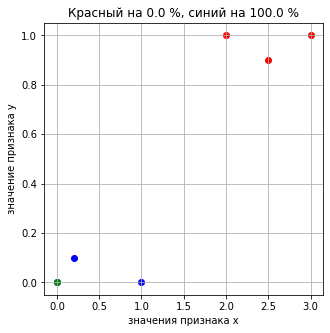

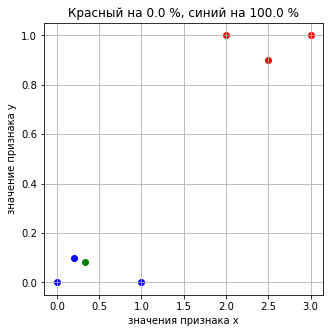

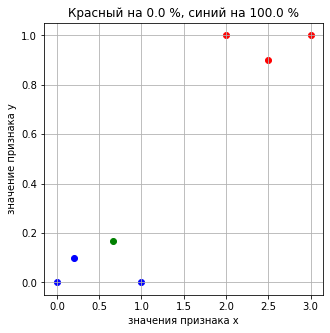

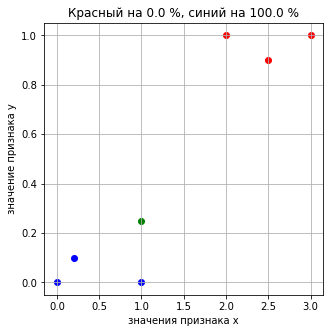

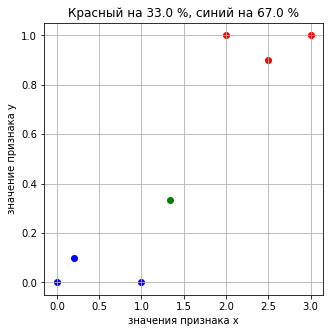

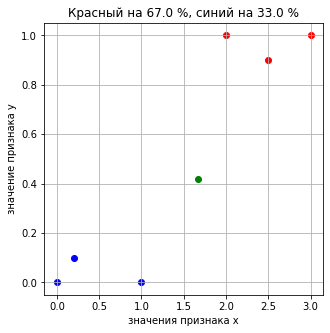

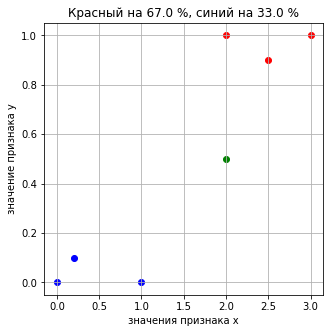

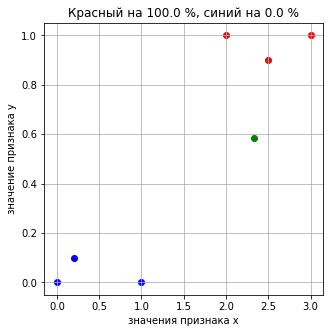

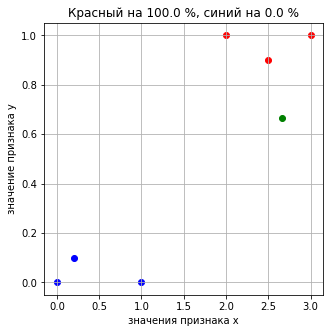

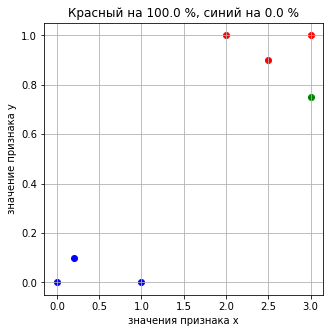

In [6]:
for item in np.linspace(0,3,10):
    x = item
    y = item*0.25
    plt.figure(figsize = (5,5))
    red = data[data.target == 1]
    blue = data[data.target == 0]
    red_prob = round(neigh.predict_proba([[x,y]])[0][1],2)*100 #вероятность принадлежности к красным
    blue_prob = round(neigh.predict_proba([[x,y]])[0][0],2)*100 #вероятность принадлежности к синим
    plt.title(f'Красный на {red_prob} %, синий на {blue_prob} %')
    plt.xlabel('значения признака x')
    plt.ylabel('значение признака y')
    plt.scatter(red.x.values,red.y.values ,c= 'r')
    plt.scatter(blue.x.values,blue.y.values ,c= 'b')
    plt.scatter(x,y ,c= 'g')
    plt.grid()
    plt.show()

Как можно видеть, когда зеленая точка «улетает» из кластера синих точек, вероятность падает, при этом вероятность принадлежности к классу в данном случае может принимать всего четыре значения (0, 0.33, 0.66, 1) в зависимости от количества соседей, так как не учтено расстояние при подсчёте вероятности. 

In [7]:
# Попробуем учесть расстояние. 
# Для этого в модель подадим параметр weights='distance'.
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

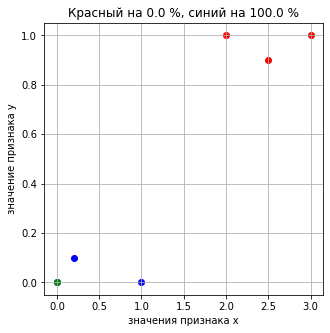

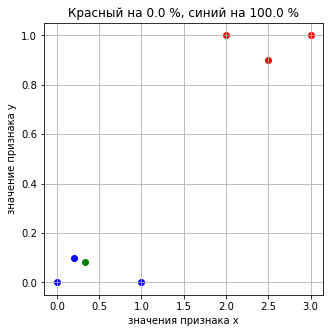

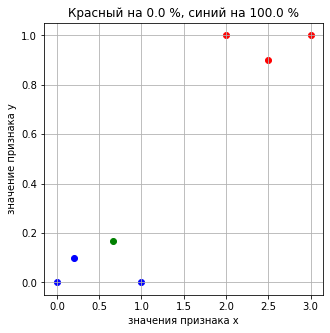

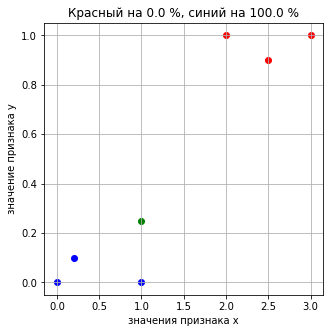

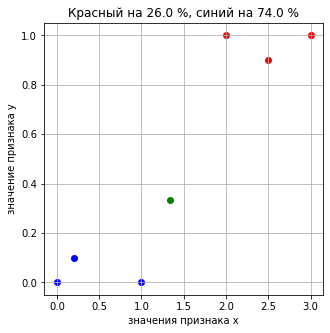

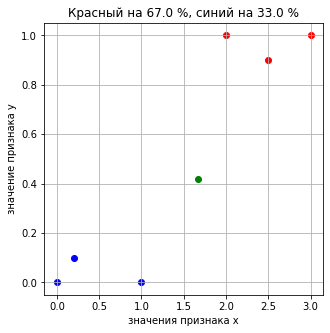

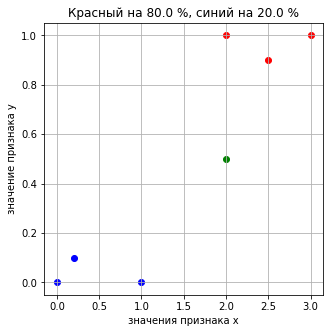

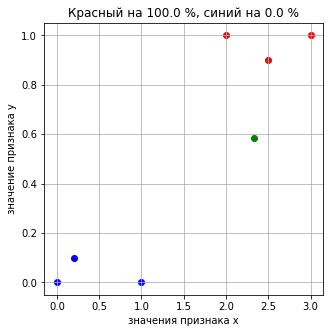

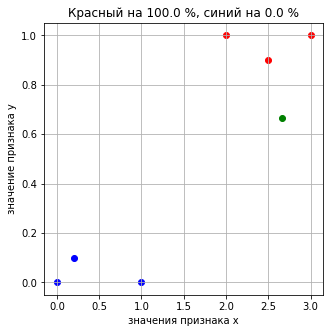

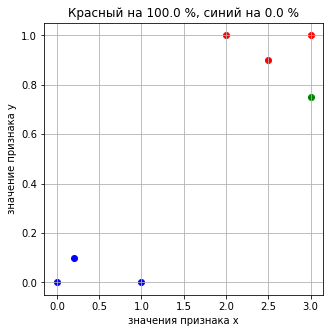

In [8]:
for item in np.linspace(0,3,10):
    x = item
    y = item*0.25
    plt.figure(figsize = (5,5))
    red = data[data.target == 1]
    blue = data[data.target == 0]
    red_prob = round(neigh.predict_proba([[x,y]])[0][1],2)*100 #вероятность принадлежности к красным
    blue_prob = round(neigh.predict_proba([[x,y]])[0][0],2)*100 #вероятность принадлежности к синим
    plt.title(f'Красный на {red_prob} %, синий на {blue_prob} %')
    plt.xlabel('значения признака x')
    plt.ylabel('значение признака y')
    plt.scatter(red.x.values,red.y.values ,c= 'r')
    plt.scatter(blue.x.values,blue.y.values ,c= 'b')
    plt.scatter(x,y ,c= 'g')
    plt.grid()
    plt.show()

**Примечание**. В случае задачи регрессии целевая метка нашего объекта определяется как среднее значение целевой метки по `k` ближайшим соседям.

Расчёты ведутся точно так же, только вместо вероятности предсказания класса высчитывается среднее по ближайшим соседям. Также при использовании взвешенного подхода, среднее уже будет взвешенным в зависимости от расстояния до соседа: чем ближе к точке, тем больший вклад соседа.

Предположим, целевая метка у трёх ближайших соседей в нашем случае равна 0.2, 0.3 и 0.8 соответственно, целевая метка без учёта расстояния равна (0.2+0.3+0.8)/3 = 0.43. 

# СНИЖЕНИЕ РАЗМЕРНОСТИ

Снижение размерности также является основной задачей `Metric Learning`. Её суть заключается в снижении размерности признакового пространства с сохранением информативности для дальнейшей работы с уменьшенным признаковым пространством в различных задачах, например задачах классификации или кластеризации. 

Тем самым, мы можем найти некоторое пространство, в котором мы можем достаточно точно разделить наши объекты по кластерам/классам или вовсе найти такое представление данных, в которых наша задача будет решаться тривиальным образом. Чаще всего это требуется для задач, в которых ограничены ресурсы, например для вычисления моделей на мобильных устройствах, а также для большей интерпретируемости результатов модели. 

Тем самым мы, претерпевая небольшие потери в качестве моделей и данных, получаем гораздо менее ресурсоемкие результаты, которые можно далее визуализировать.

Основным методом снижения размерности в задачах кластеризации является `PCA` (`principal component analysis`, **метод главных компонент**), с которым мы познакомились в курсе ранее. 

Это один из самых интересных подходов в `Metric Learning`, так как мы ищем пространство меньшего размера, в котором будет максимально сохранена информация о дисперсии. В этом методе заключены преобразования пространства, поиск расстояний, проекция данных на полученный новый базис. 

# 8. Metric Leraning. Практика <a class="anchor" id=8></a>

[к содержанию](#0)

## Файл `ML-8._Metrics_learning.ipynb`

# 9. Итоги <a class="anchor" id=9></a>

[к содержанию](#0)